In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\aditya\Desktop\Project\Dataset\Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes'] = df['Classes'].str.strip()

In [8]:
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
df.drop(['day', 'month', 'year', 'Region'], axis = 1, inplace = True)

In [11]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [12]:
X = df.drop('FWI', axis = 1) # Independent features
y = df['FWI'] # Dependent feature

In [13]:
X.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes'],
      dtype='object')

In [14]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0


In [15]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [16]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [18]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000


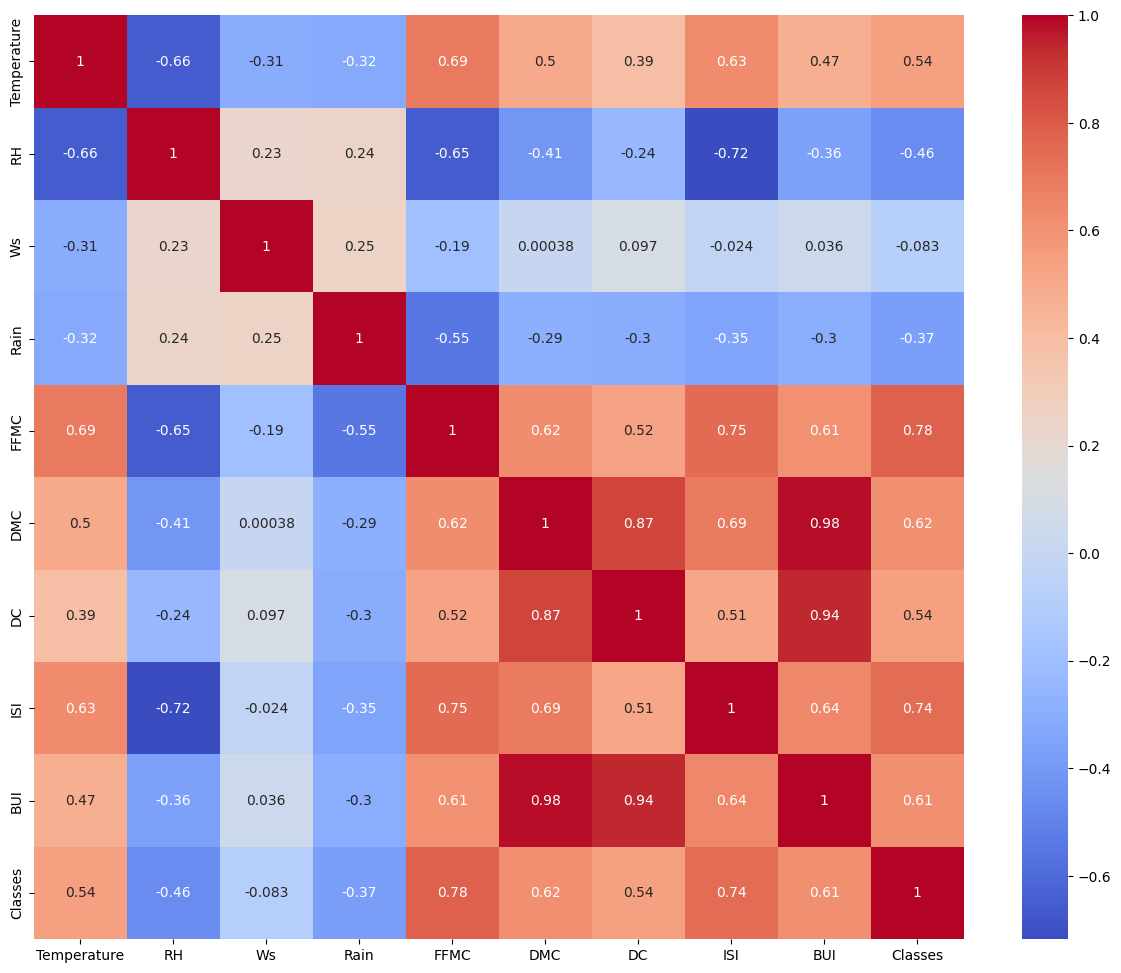

In [19]:
plt.figure(figsize=(15, 12))  # Adjust the size: width=15, height=12
corr = X_train.corr()  # Ensure X_train is a DataFrame
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [20]:
import pickle
from pathlib import Path

def min_max(X_train, X_test):
    minmax = MinMaxScaler()
    X_train_scaled = minmax.fit_transform(X_train)
    X_test_scaled = minmax.transform(X_test)

    file = open(r"C:\Users\aditya\Desktop\Project\Model\MinMaxScaler.pkl", 'wb')
    pickle.dump(minmax, file)
    file.close()

    return X_train_scaled, X_test_scaled

In [21]:
X_train_scaled, X_test_scaled = min_max(X_train, X_test)

In [22]:
X_train_scaled

array([[0.35      , 0.76811594, 0.61111111, ..., 0.11052632, 0.06306306,
        0.        ],
       [0.45      , 0.73913043, 0.33333333, ..., 0.04210526, 0.03453453,
        0.        ],
       [0.9       , 0.14492754, 0.38888889, ..., 0.87368421, 0.31531532,
        1.        ],
       ...,
       [0.15      , 0.79710145, 0.5       , ..., 0.01052632, 0.00600601,
        0.        ],
       [0.6       , 0.55072464, 0.44444444, ..., 0.38947368, 0.27177177,
        1.        ],
       [0.4       , 0.8115942 , 0.72222222, ..., 0.05789474, 0.01501502,
        0.        ]])

### Box Plots To understand effect of MinMaxScaler

Text(0.5, 1.0, 'X_train after Scaling')

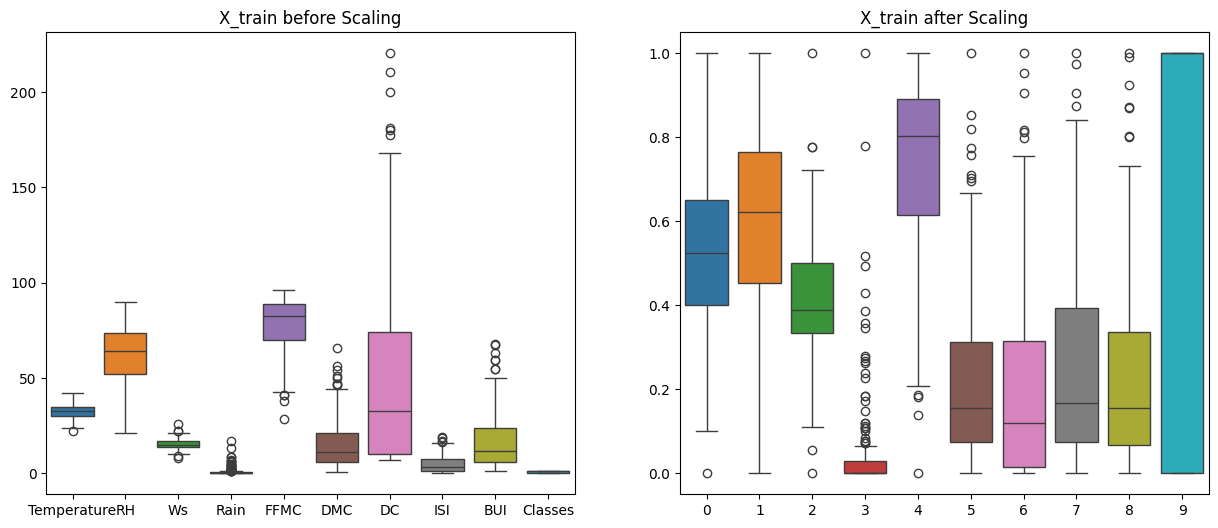

In [23]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train after Scaling')

### Linear Regression Model

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error", mae)
print("Mean squared error", mse)
print("R2 score", score)

Mean absolute error 0.4669258081963337
Mean squared error 0.49166442469887567
R2 score 0.988891586210307


In [25]:
file = open(r"C:\Users\aditya\Desktop\Project\Model\Prediction_model", 'wb')
pickle.dump(linreg, file)
file.close

<function BufferedWriter.close()>